In [ ]:
'''
Author: Harsita Mohanty

'''
#This only consists of the google colab code, there are other files stored locally in spyder application. An integrated webcam used on mobile phone is also used (application name- IPwebcam)


There are 4 other files used in Spyder application stored locally.
1. ***collect_data.py*** which is used to click 100 images per person to collect data of a particular person integrating the code with the camera from IPwebcam on mobile phone. Data cleaning is done manually by removing photos which are not faces or are blurry, mostly any picture that may confuse the machine.
2. ***consolidate_data.py*** which is used to compress the images and create .p extension files to be used in the below google colab file. They are uploaded manually and locally and the pickled data is unpickled and further processing and creating of a model is done here.
3. ***haarcascade_frontalface_default.xml*** which consists of datas to identify faces and train the model accordingly. It is used for object detection — commonly for detecting faces, eyes, traffic signs, etc. in images.
4. ***recognize.py*** which finally takes the downloaded model and applies it in real time to make predictions.

In [ ]:
#Unpickling the data
import pickle

with open("/content/images.p", "rb") as f:
    images = pickle.load(f)

with open("/content/labels.p", "rb") as f:
    labels = pickle.load(f)

In [ ]:
print(images.shape)
print(labels.shape)

(493, 100, 100)
(493,)


In [ ]:
set(labels)

{np.str_('Aarav'),
 np.str_('Harsita'),
 np.str_('Maaa'),
 np.str_('Mama'),
 np.str_('Papaa')}

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

labels = le.fit_transform(labels)

In [ ]:
set(labels)

{np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4)}

In [ ]:
le.inverse_transform([0,1,2,3,4])

array(['Aarav', 'Harsita', 'Maaa', 'Mama', 'Papaa'], dtype='<U7')

In [ ]:
p = len(set(labels))
print("Total no. of persons: ", p)

Total no. of persons:  5


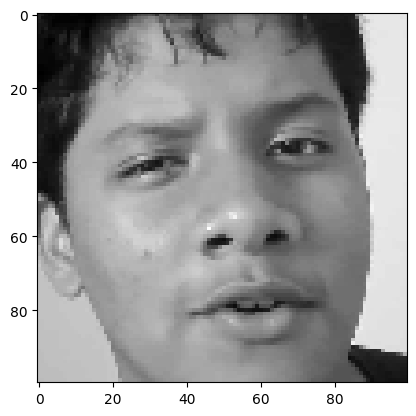

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(images[65], cmap = 'gray')
plt.show()

In [ ]:
import cv2

In [ ]:
def preprocessing(img):
  # Convert image to 8-bit unsigned integer format
  img = img.astype(np.uint8) #new line new line
  img = cv2.equalizeHist(img)
  img = img.reshape(100,100,1)
  img = img/255
  return img

In [ ]:
#equalizehist enhances the photo

In [ ]:
import numpy as np

In [ ]:
images = np.array(list(map(preprocessing, images)))
print("Shape of input: ", images.shape)

Shape of input:  (493, 100, 100, 1)


In [ ]:
images = np.array([preprocessing(img) for img in images])
print("Image shape:", images.shape)
print("Labels shape:", labels.shape) #new line

Image shape: (493, 100, 100, 1)
Labels shape: (493,)


In [ ]:
#map helps to apply all work

In [ ]:
from keras.utils import to_categorical
labels = to_categorical(labels)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(
    images, labels, test_size=0.2, stratify=labels, random_state=42
) #new line

In [ ]:
#Model Training
def Lenet_Model():
  model = Sequential()
  #Concolutional and ReLU Layer
  model.add(Conv2D(30,(5,5),input_shape = (100,100,1),activation='relu'))
  #MaxPooling Layer
  model.add(MaxPooling2D(pool_size=(2,2)))
  #Convolutional and ReLU Layer
  model.add(Conv2D(15,(3,3),activation='relu'))
  #MaxPooling Layer
  model.add(MaxPooling2D(pool_size=(2,2)))
  #Flatten Layer/ Input Layer
  model.add(Flatten())
  #Hidden Layers
  model.add(Dense(50,activation='relu'))
  model.add(Dropout(0.4)) #new line
  #Output Layer
  model.add(Dense(p,activation='softmax'))
  model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
model = Lenet_Model()
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 96, 96, 30)     │           780 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 48, 48, 30)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 46, 46, 15)     │         4,065 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 23, 23, 15)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 7935)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 50)             │       396,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 5)              │           255 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 401,900 (1.53 MB)

 Trainable params: 401,900 (1.53 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#h = model.fit(images, labels, validation_split = 0.2, epochs = 20)
h = model.fit(X_train, y_train, validation_data =(X_val, y_val), epochs = 20, batch_size=16)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 181ms/step - accuracy: 0.6339 - loss: 1.3113 - val_accuracy: 0.9495 - val_loss: 0.2737
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 168ms/step - accuracy: 0.9404 - loss: 0.1980 - val_accuracy: 0.9293 - val_loss: 0.2753
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 245ms/step - accuracy: 0.9514 - loss: 0.1233 - val_accuracy: 0.9697 - val_loss: 0.2122
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 163ms/step - accuracy: 0.9803 - loss: 0.0451 - val_accuracy: 0.9697 - val_loss: 0.2152
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 221ms/step - accuracy: 0.9837 - loss: 0.0650 - val_accuracy: 0.9798 - val_loss: 0.2051
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 202ms/step - accuracy: 0.9906 - loss: 0.0278 - val_accuracy: 0.9697 - val_loss: 0.2284
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 183ms/step - accuracy: 0.9896 - loss: 0.0207 - val_accuracy: 0.9798 - val_loss: 0.2323
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 160ms/step - accuracy: 0.9931 - loss: 0.0251 - val_accuracy: 0

In [ ]:
model.save('final_model.h5')

In [ ]:
#here the model is saved and downloaded to spyder application. There the python file named recognize.py is used to identify the faces in real time through the IP webcam from the mobile.

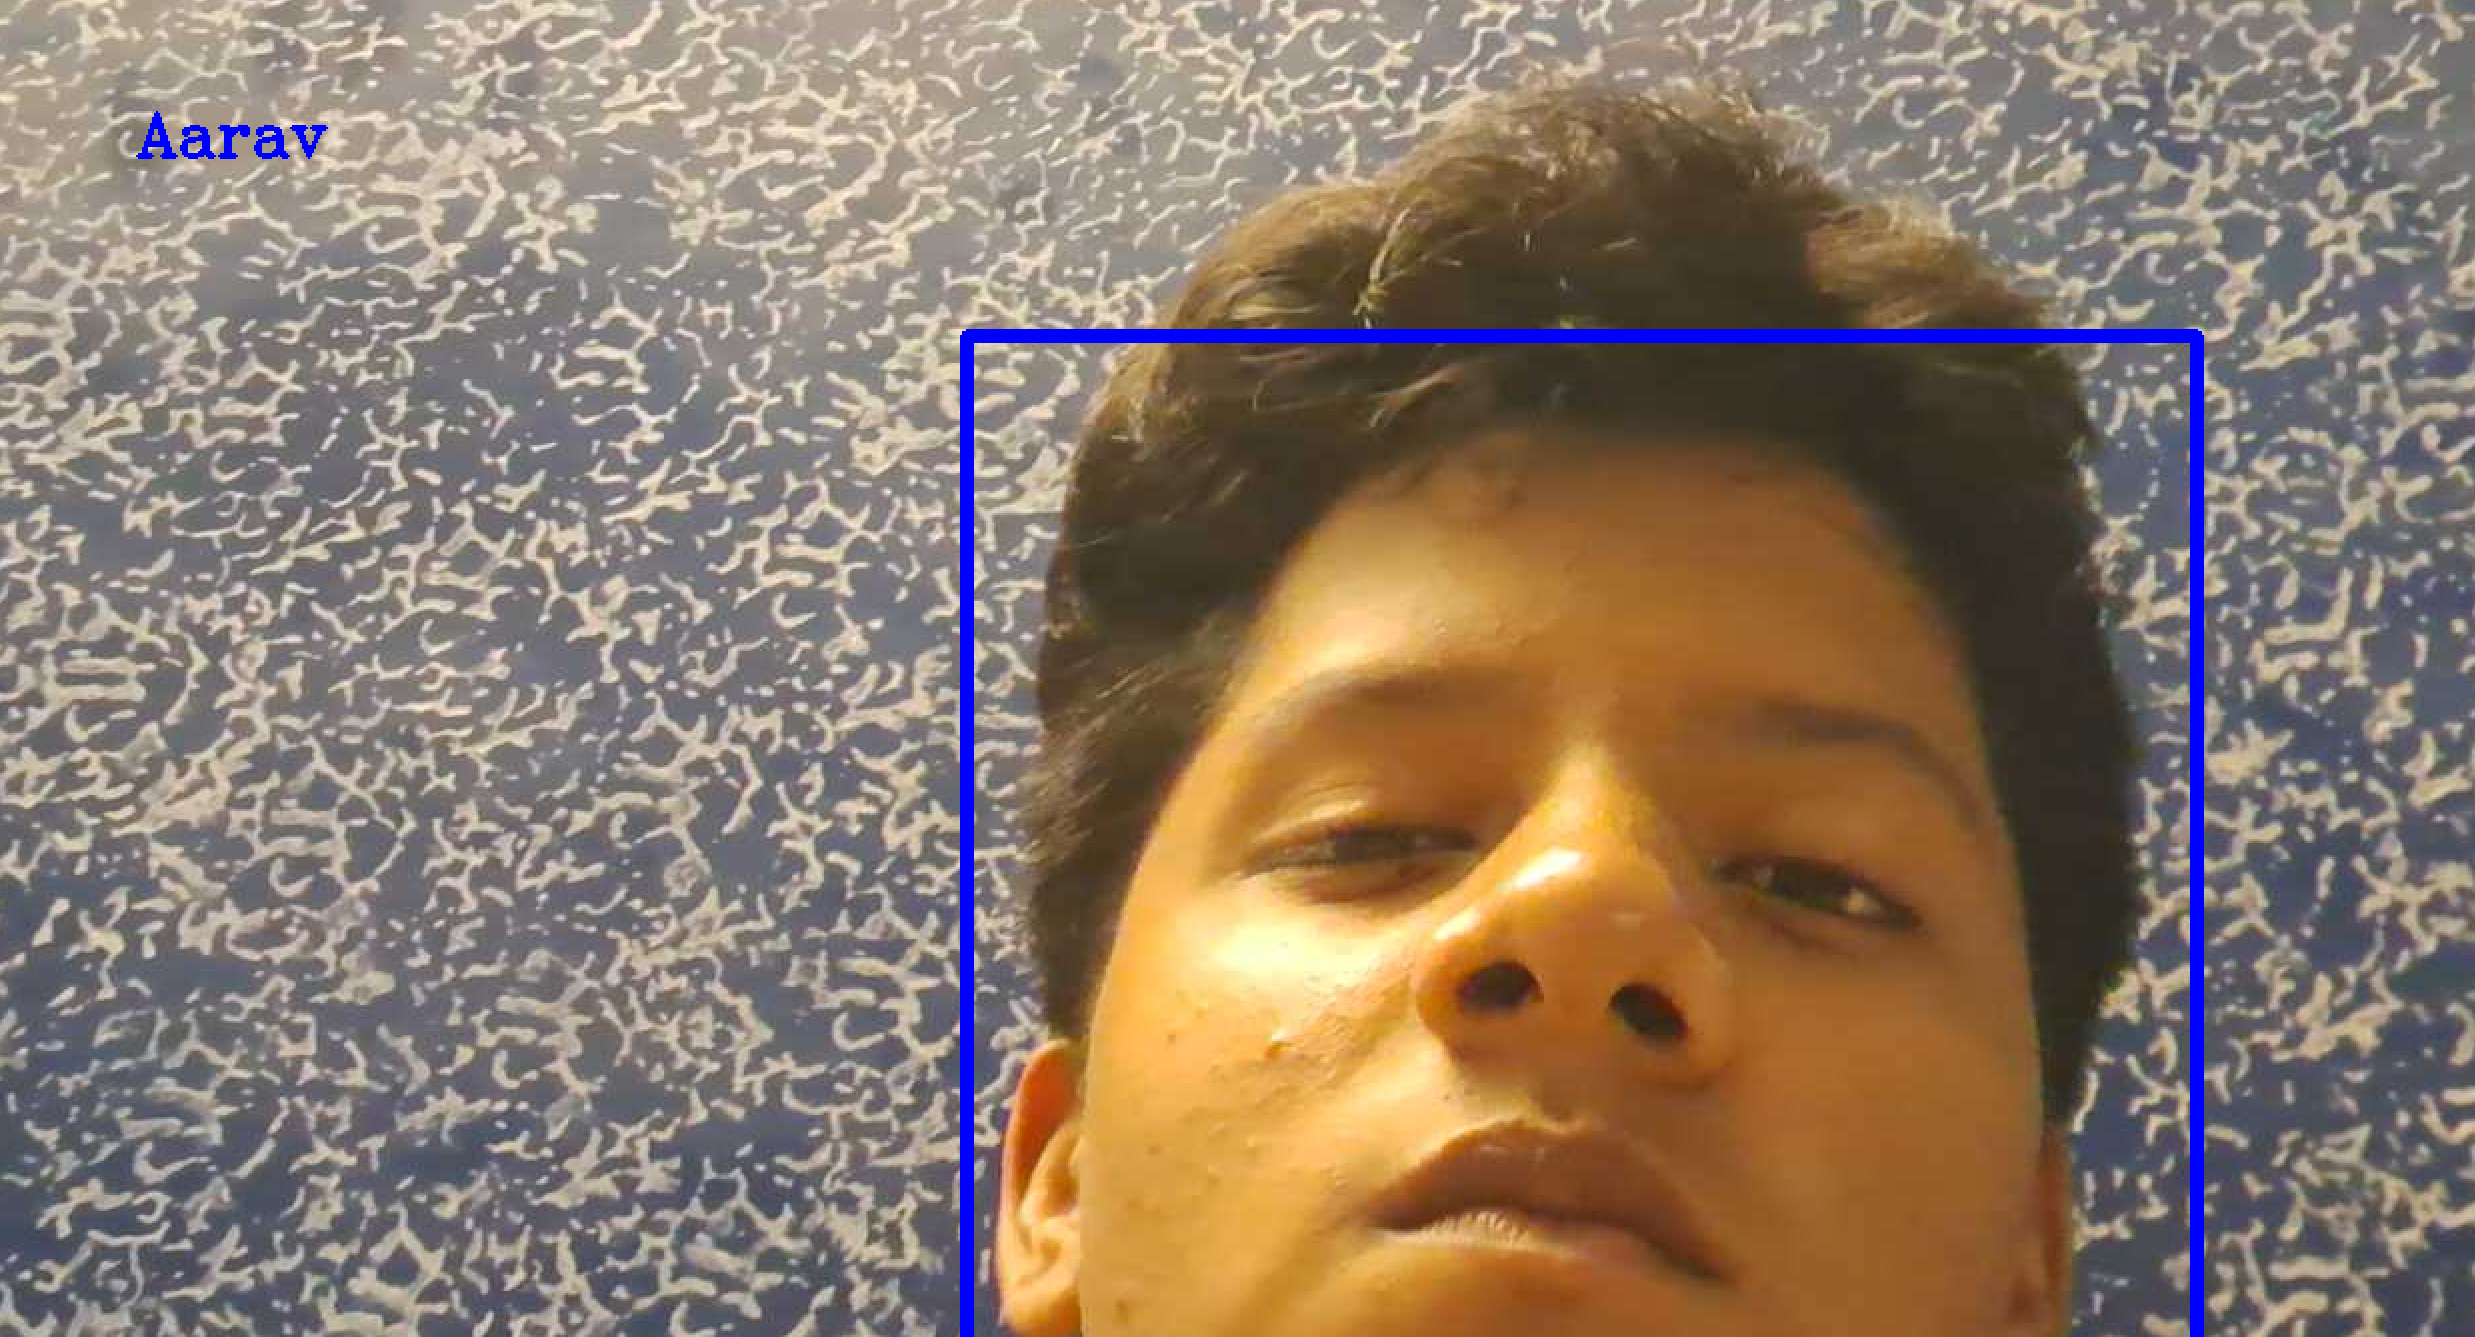

In [ ]:
#this is the result of one of the sample datas taken in real time.